<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/Timeseries_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv')
df

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [4]:
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (485, 16)


,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.6,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [5]:
df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv', sep=',',
parse_dates=['Date'], index_col='Date')

In [6]:
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
2014-01-04,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
2014-01-05,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-28,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
2015-04-29,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
2015-04-30,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811


In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

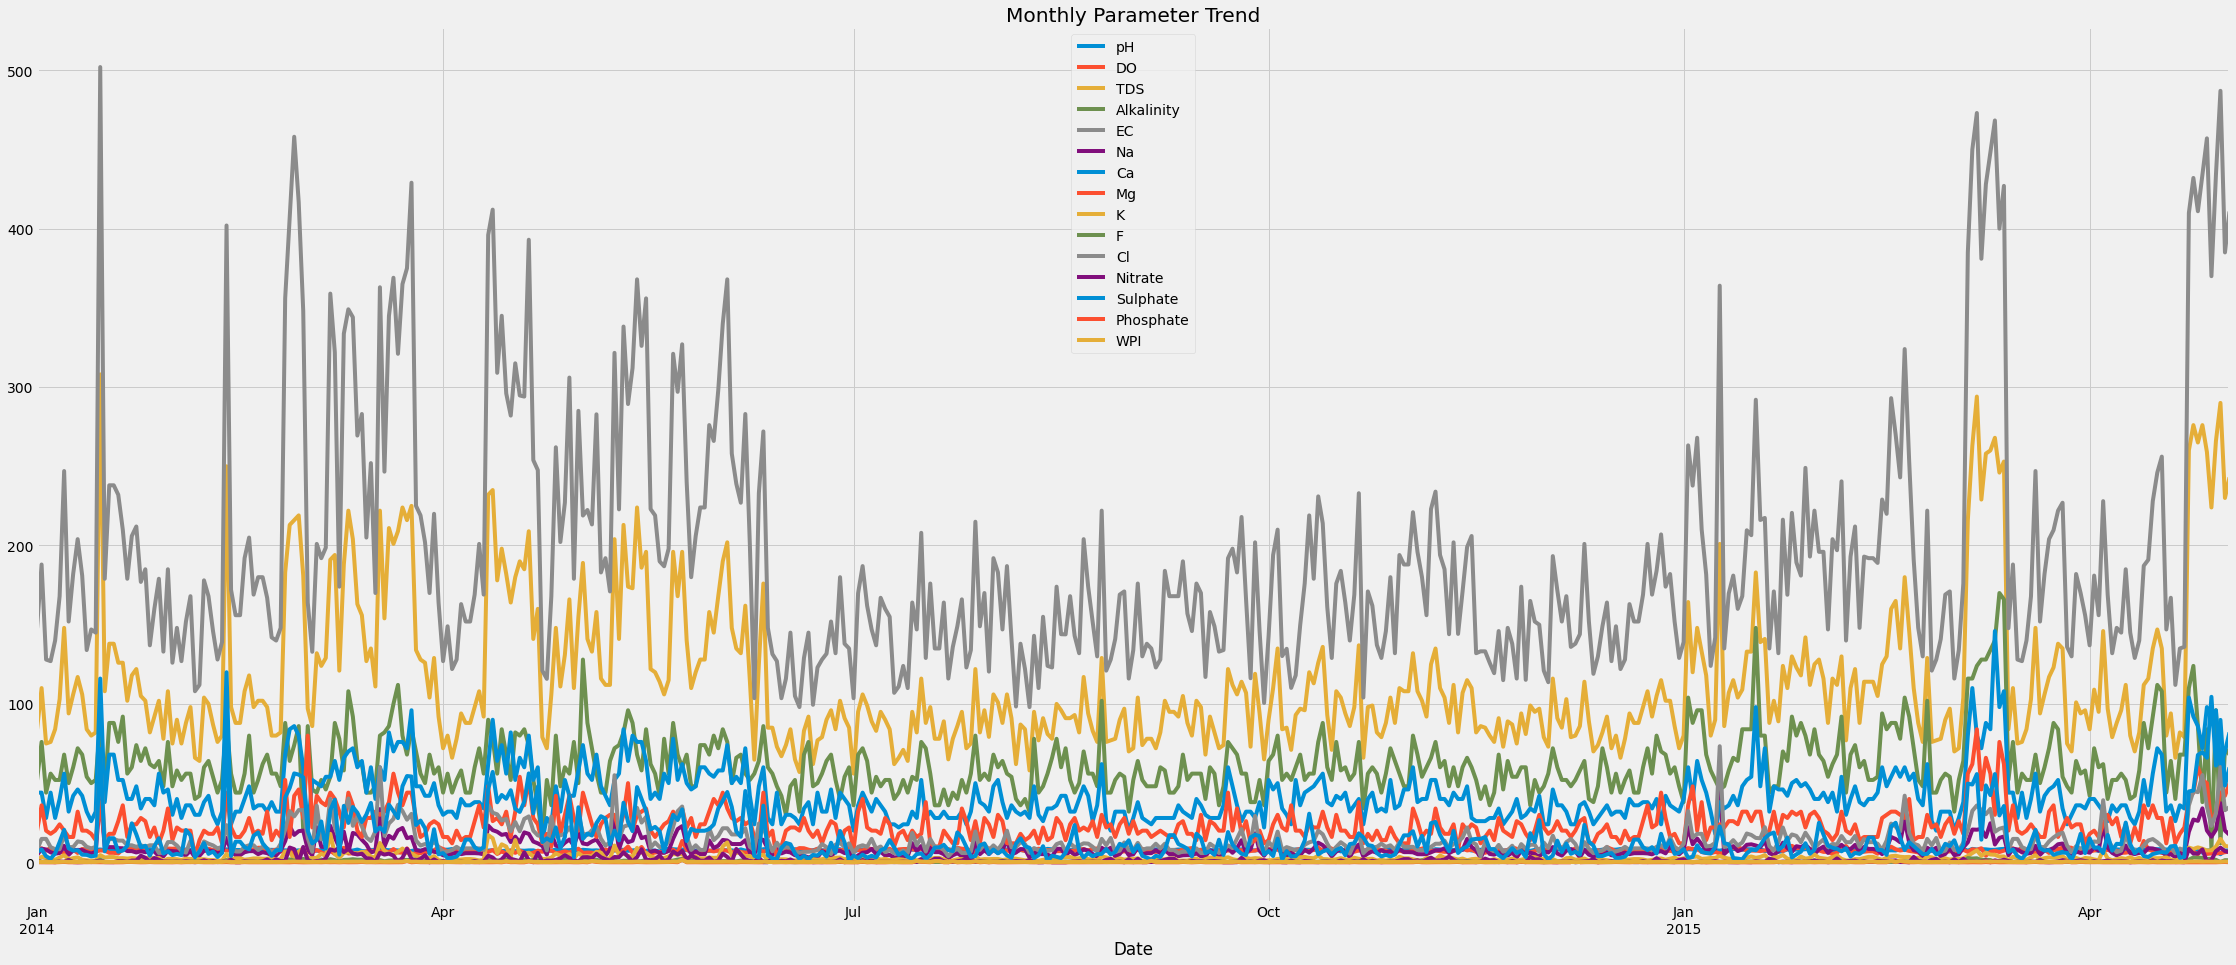

In [8]:
df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv', sep=',', parse_dates=['Date'], index_col='Date')

df.plot(figsize=(35,15))
plt.title('Monthly Parameter Trend')
plt.show()

In [9]:
df.shape

(487, 15)

In [10]:
df=df.dropna()

In [11]:
data=df
data

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
2014-01-04,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
2014-01-05,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-28,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
2015-04-29,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
2015-04-30,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811


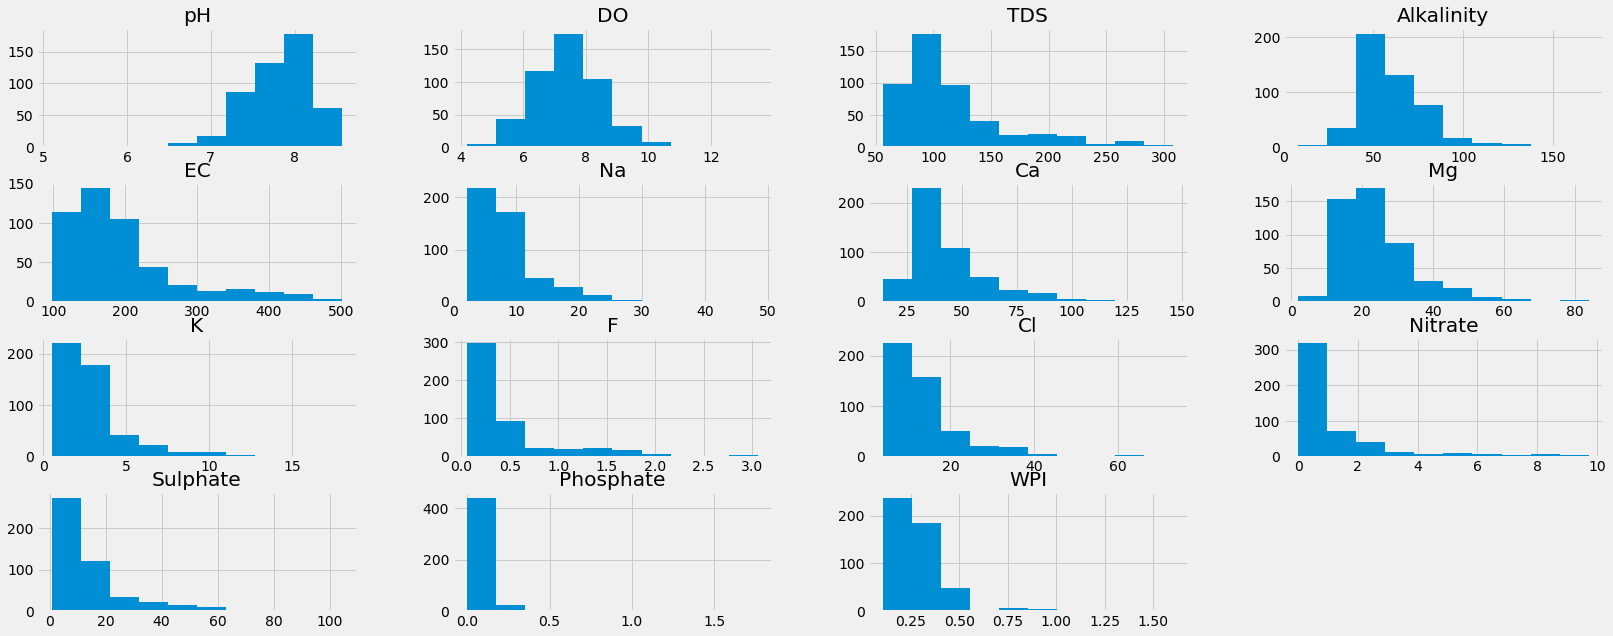

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(25,10))
data.hist(ax=ax1)
data.plot(kind='kde', ax=ax2)
plt.show();

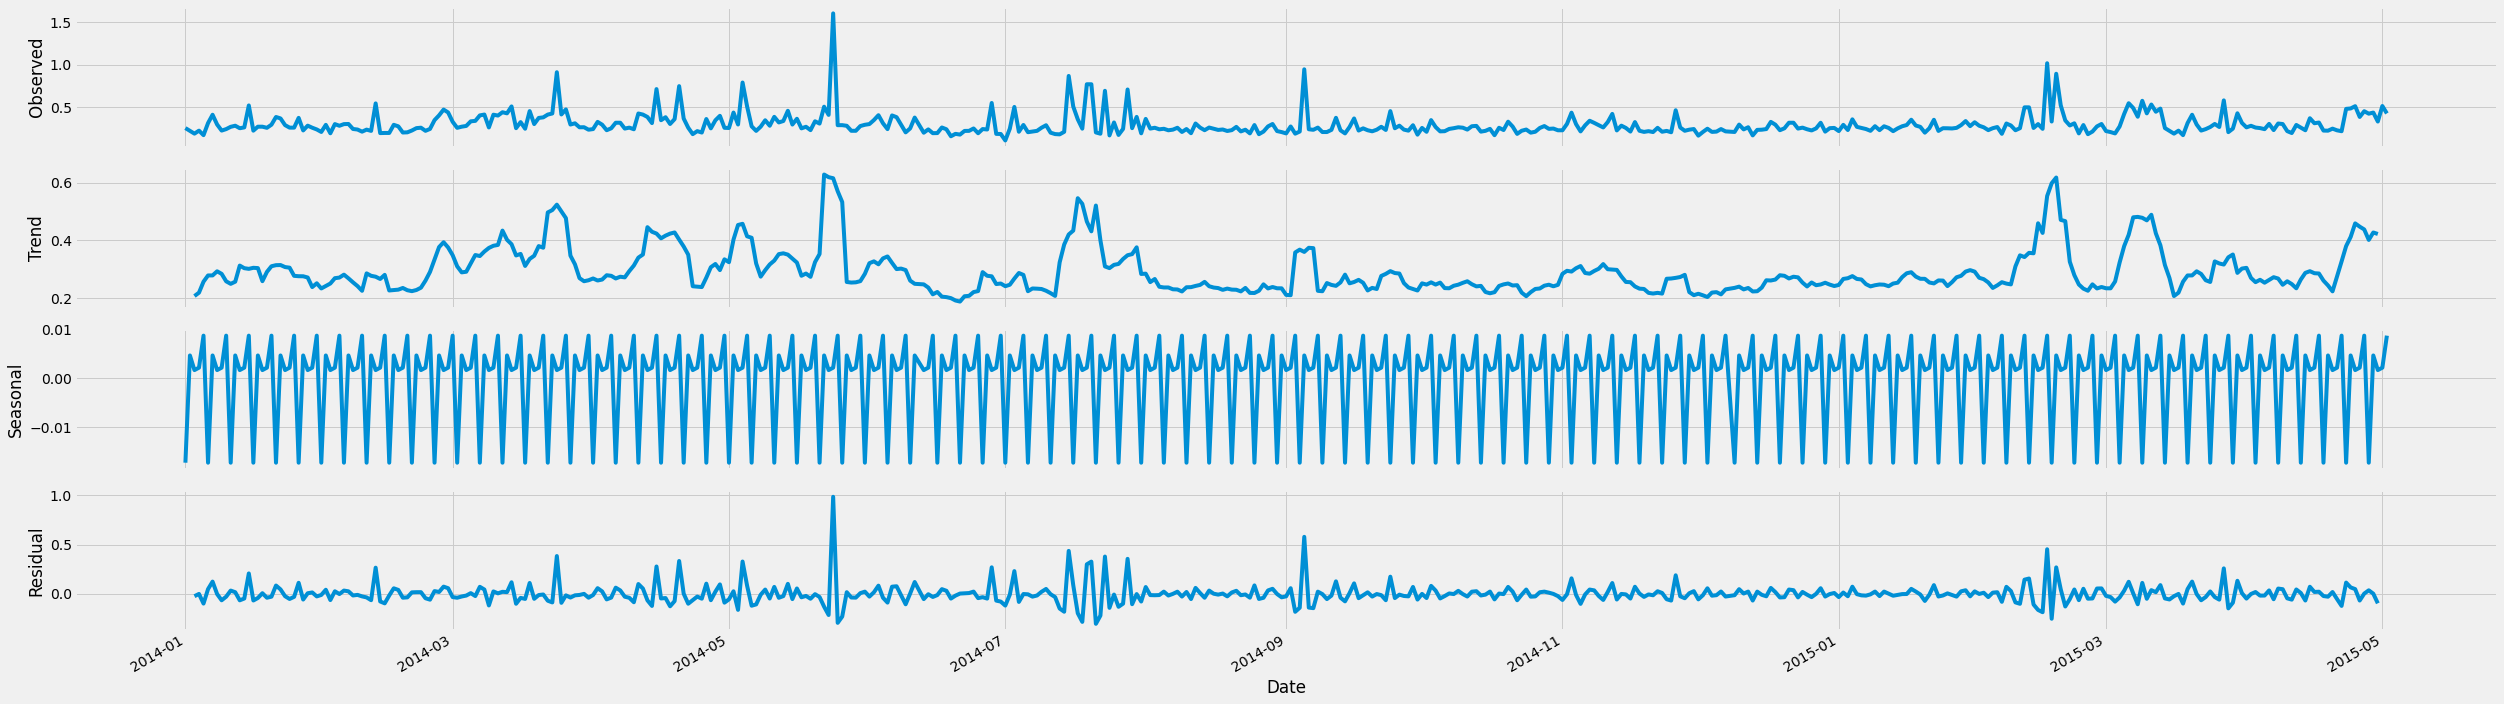

In [13]:
decomposition = seasonal_decompose(data['WPI'], freq=5, model='additive')
plt.rcParams['figure.figsize'] = 35, 10
decomposition.plot()
plt.show();

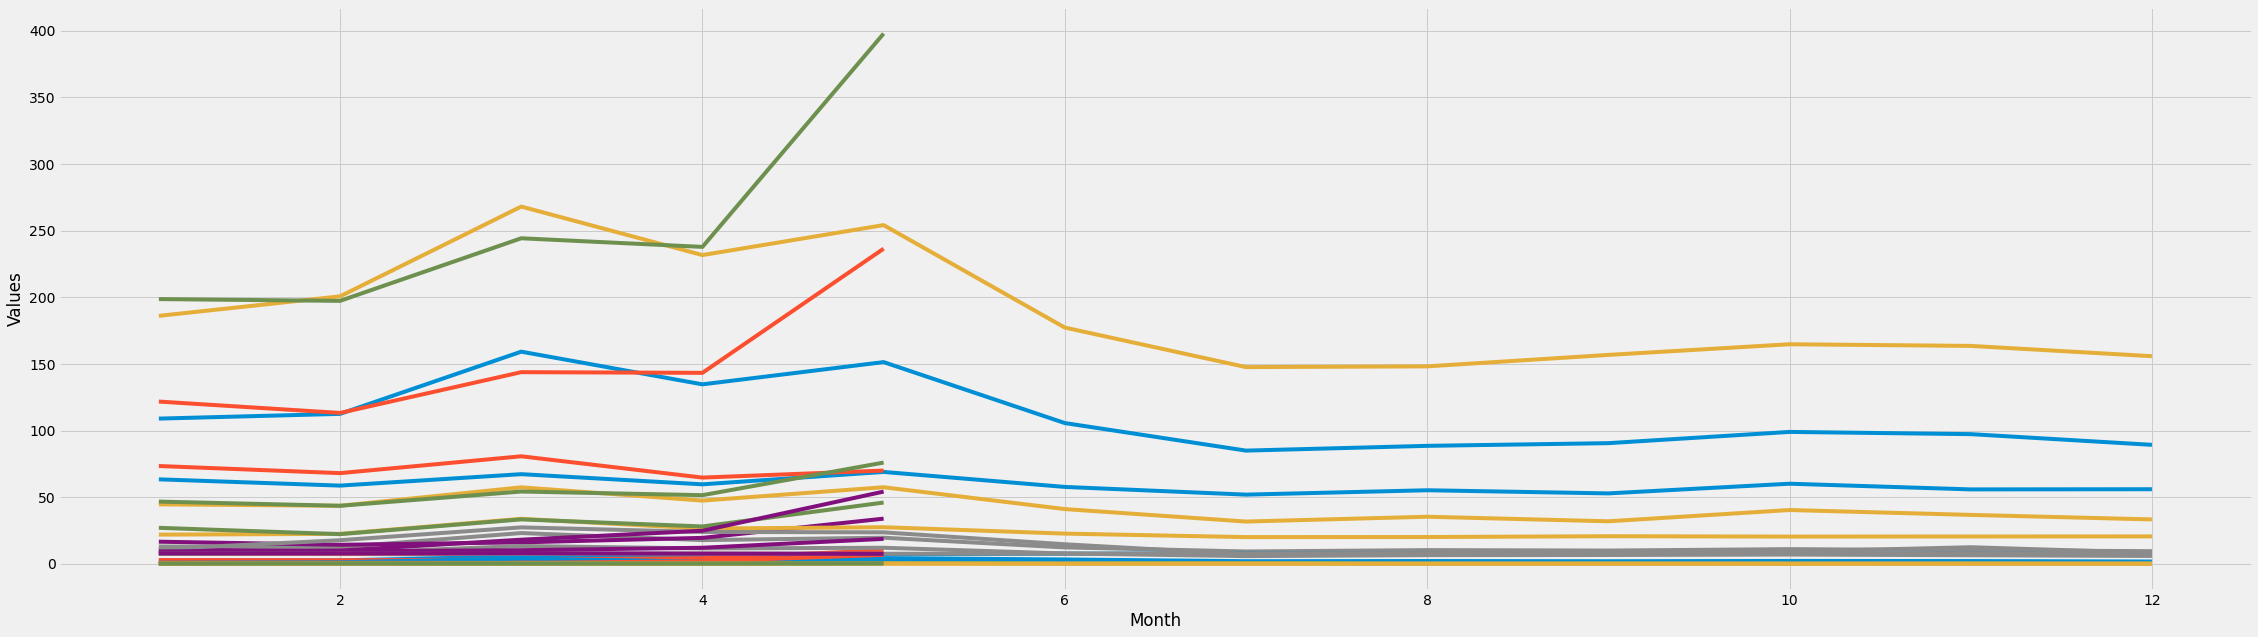

In [14]:
data['year'] = data.index.year
data['month'] = data.index.month
data_pivot = pd.pivot_table(data, index='month', columns='year', aggfunc='mean')
data_pivot.plot(figsize=(35,10))
plt.legend().remove()
plt.xlabel('Month')
plt.ylabel('Values')
plt.show()

In [15]:
df.drop(['year', 'month'], axis=1, inplace=True)

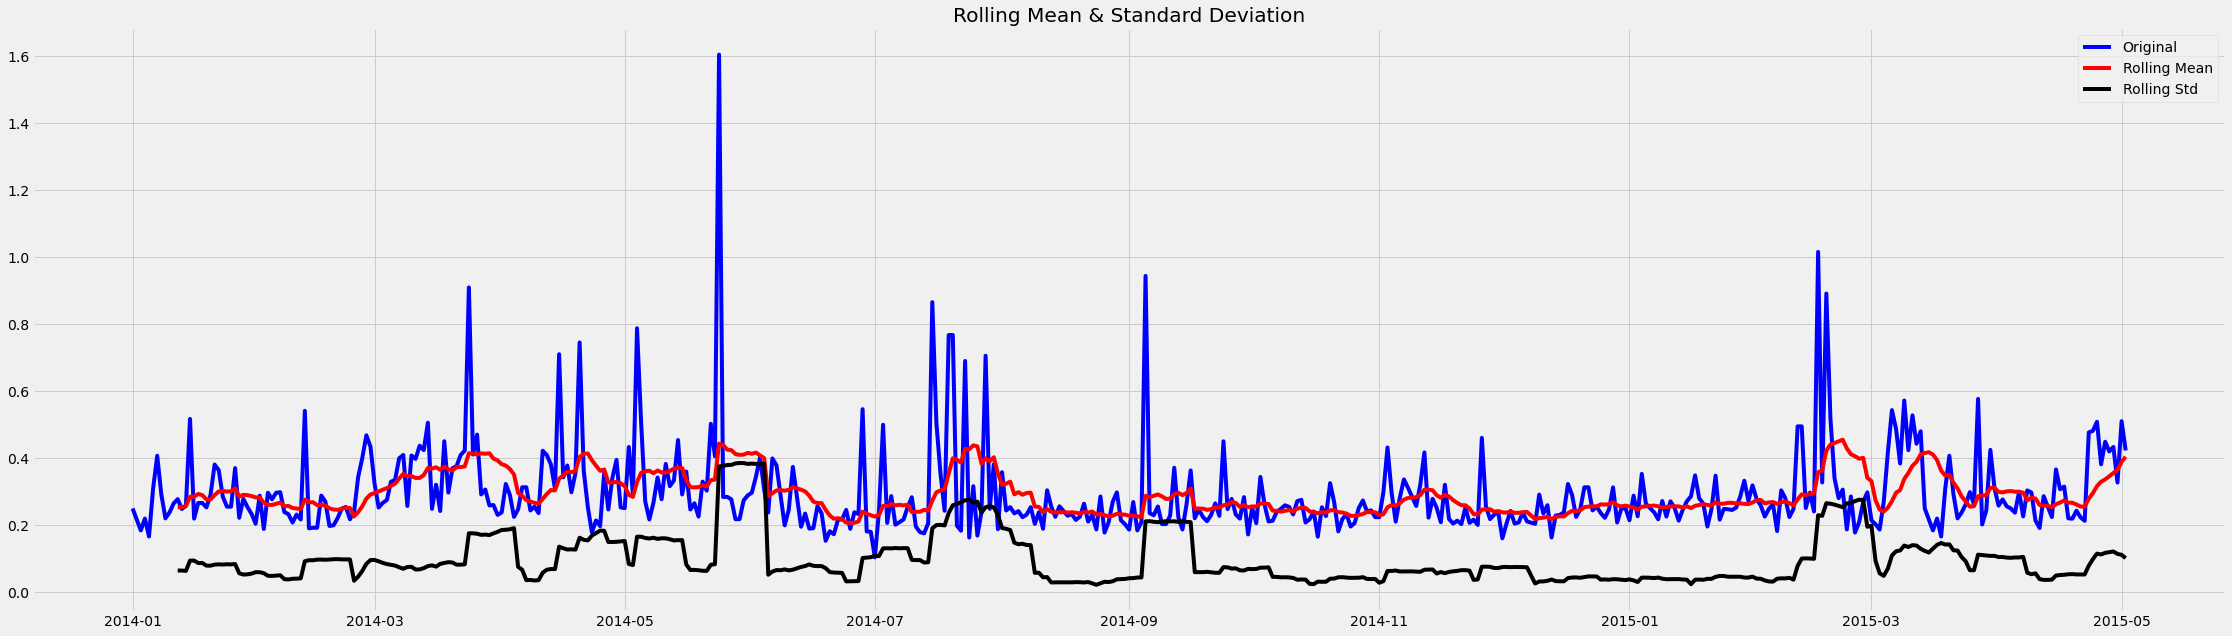

In [16]:
#Determing rolling statistics
rolmean = pd.Series(data['WPI']).rolling(window=12).mean()
rolstd = pd.Series(data['WPI']).rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(data['WPI'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [17]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data['WPI'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -8.168207e+00
p-value                        8.765895e-13
#Lags Used                     3.000000e+00
Number of Observations Used    4.810000e+02
Critical Value (1%)           -3.444018e+00
Critical Value (5%)           -2.867568e+00
Critical Value (10%)          -2.569980e+00
dtype: float64


In [18]:
df_diff = data.diff().diff(12)

In [19]:
df_diff.dropna(inplace=True)

In [20]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_diff['WPI'])

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.080418e+01
p-value                        1.982631e-19
#Lags Used                     1.800000e+01
Number of Observations Used    4.530000e+02
Critical Value (1%)           -3.444868e+00
Critical Value (5%)           -2.867941e+00
Critical Value (10%)          -2.570180e+00
dtype: float64


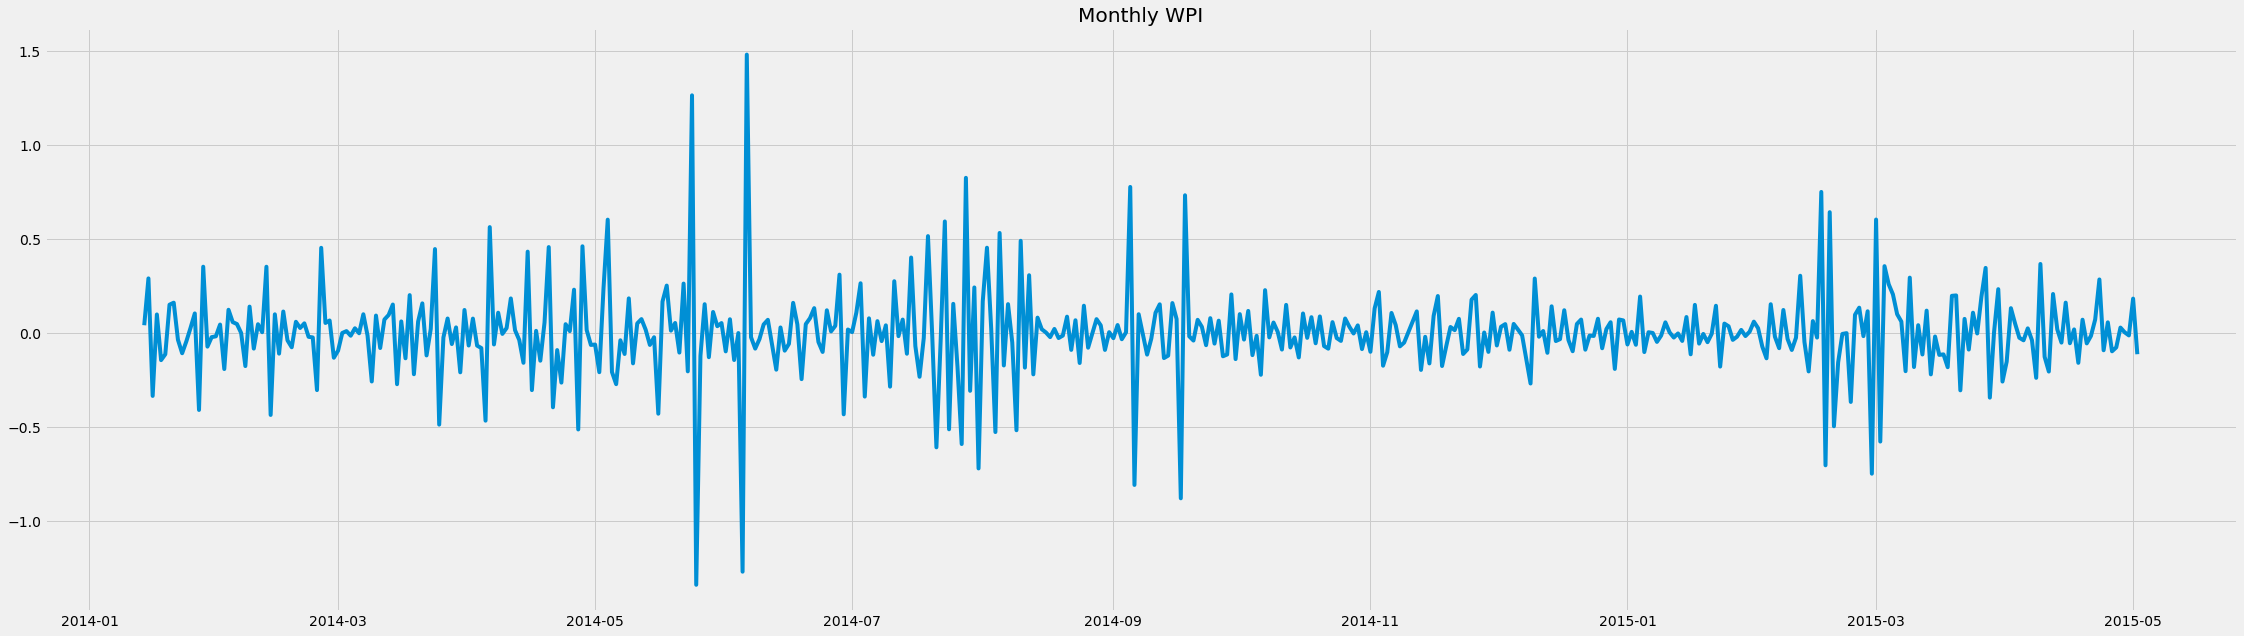

In [21]:
plt.plot(df_diff['WPI'])
plt.title('Monthly WPI')
plt.savefig('diffplot')
plt.show()

In [22]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.1MB/s 
     |████████████████████████████████| 9.5MB 35.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [23]:
import pmdarima as pm
model = pm.auto_arima(data['WPI'], d=1, D=1,
                      seasonal=True, m=12, trend='c', 
                      start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=7.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=0.690, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-268.264, Time=1.68 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=6.68 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-124.486, Time=0.24 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-315.916, Time=5.66 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=16.81 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=8.07 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-196.219, Time=4.03 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-340.720, Time=7.52 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-298.127, Time=3.90 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=20.70 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=13.65 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-373.098, Time=10.26 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=-320.

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  485
Model:             SARIMAX(4, 1, 1)x(2, 1, 0, 12)   Log Likelihood                 222.624
Date:                            Sun, 13 Jun 2021   AIC                           -427.247
Time:                                    15:56:08   BIC                           -389.834
Sample:                                         0   HQIC                          -412.531
                                            - 485                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.735e-06      0.000      0.012      0.991      -0.000       0.000
ar.L1          0.1852      0.038      4.869      0.000       0.111       0.260
ar.L2          0.1107      0.032      3.463      0.001       0.048       0.173
ar.L3         -0.0088      0.050     -0.177      0.860      -0.106       0.089
ar.L4          0.0865      0.034      2.559      0.011       0.020       0.153
ma.L1         -0.9861      0.015    -64.274      0.000      -1.016      -0.956
ar.S.L12      -0.6329      0.023    -27.499      0.000      -0.678      -0.588
ar.S.L24      -0.2800      0.027    -10.524      0.000      -0.332      -0.228
sigma2         0.0224      0.001     35.675      0.000       0.021       0.024
===================================================================================
Ljung-Box (Q):                       90.19   Jarque-Bera (JB):              5031.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             2.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

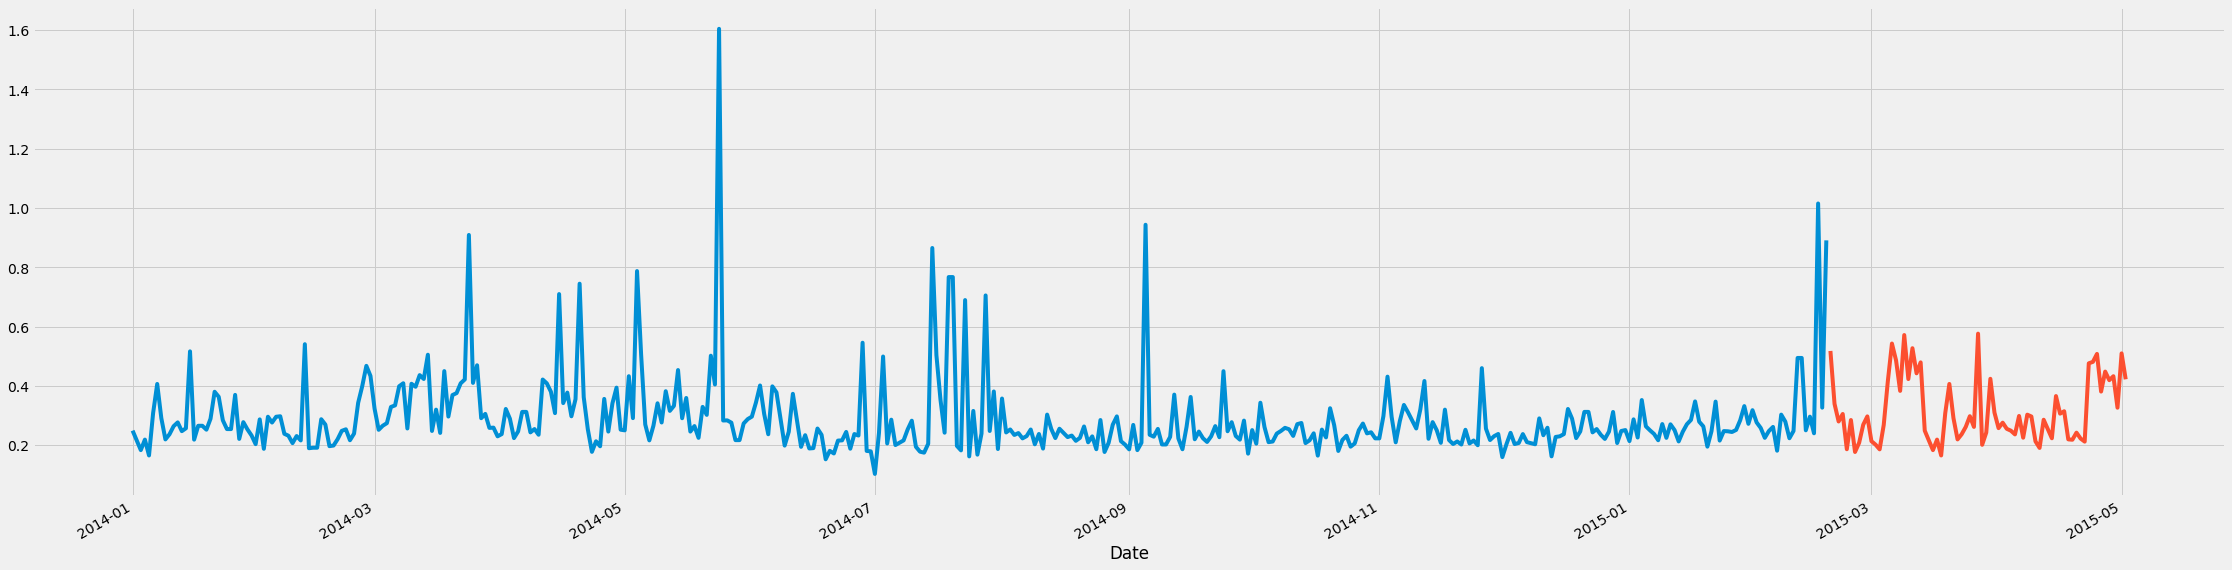

In [25]:
#divide into train and validation set
train = data[:int(0.85*(len(df)))]
test = data[int(0.85*(len(df))):]

#plotting the data
train['WPI'].plot()
test['WPI'].plot()

In [26]:
model = SARIMAX(train['WPI'],order=(1,1,0),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  try:


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                WPI   No. Observations:                  412
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 12)   Log Likelihood                 167.615
Date:                            Sun, 13 Jun 2021   AIC                           -329.231
Time:                                    15:56:10   BIC                           -317.264
Sample:                                         0   HQIC                          -324.491
                                            - 412                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4962      0.017    -28.670      0.000      -0.530      -0.462
ma.S.L12      -0.9960      0.649     -1.534      0.125      -2.269       0.277
sigma2         0.0228      0.014      1.591      0.112      -0.005       0.051
===================================================================================
Ljung-Box (Q):                       95.49   Jarque-Bera (JB):              3252.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

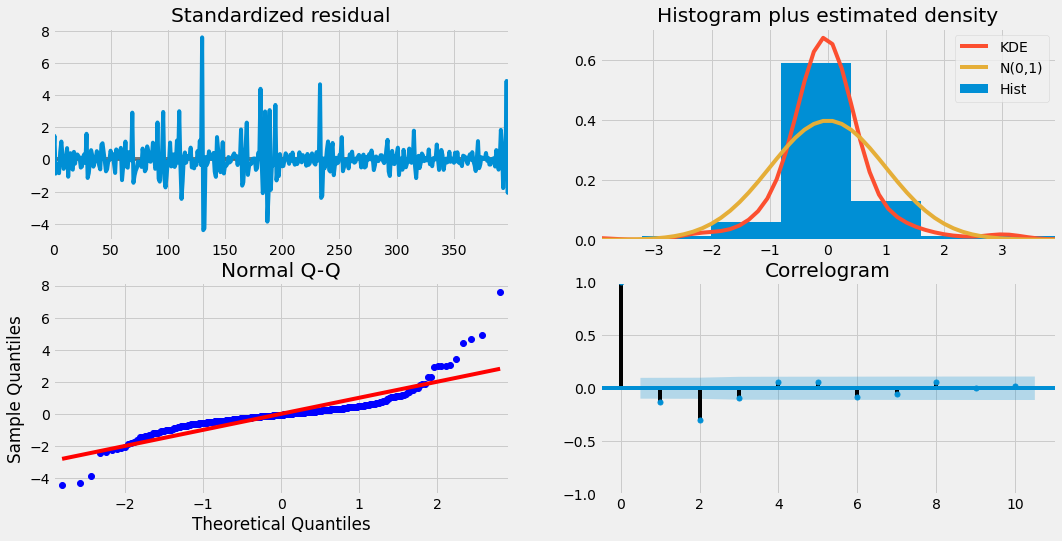

In [27]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

In [28]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from datetime import datetime
import pandas as pd 
import os

In [29]:
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
2014-01-04,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.6,0.299591,2.238750,0.01536,0.219282
2014-01-05,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [30]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 485 entries, 2014-01-01 to 2015-05-02
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          485 non-null    float64
 1   DO          485 non-null    float64
 2   TDS         485 non-null    float64
 3   Alkalinity  485 non-null    int64  
 4   EC          485 non-null    float64
 5   Na          485 non-null    float64
 6   Ca          485 non-null    int64  
 7   Mg          485 non-null    int64  
 8   K           485 non-null    float64
 9   F           485 non-null    float64
 10  Cl          485 non-null    float64
 11  Nitrate     485 non-null    float64
 12  Sulphate    485 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         485 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 60.6 KB


In [32]:
pip install auto_ts

     |████████████████████████████████| 92kB 4.0MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
     |████████████████████████████████| 972kB 33.9MB/s 
     |████████████████████████████████| 122kB 42.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv')
df

,Date,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,01-Jan-14,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,02-Jan-14,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,03-Jan-14,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,04-Jan-14,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
4,05-Jan-14,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,28-Apr-15,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,29-Apr-15,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,30-Apr-15,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,01-May-15,7.40,6.4,230.0,72,385.0,20.06,70,42,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import auto_ts as AT

import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

Imported auto_timeseries version:0.0.36. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATA/timeser.csv', sep=',',
parse_dates=['Date'], index_col='Date')

In [5]:
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
2014-01-04,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
2014-01-05,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-28,7.60,5.6,224.0,8,370.0,16.14,92,24,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
2015-04-29,7.30,5.6,266.0,96,434.0,20.56,96,32,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
2015-04-30,5.10,5.8,290.0,12,487.0,37.35,60,44,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 2014-01-01 to 2015-05-02
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          487 non-null    float64
 1   DO          487 non-null    float64
 2   TDS         487 non-null    float64
 3   Alkalinity  487 non-null    int64  
 4   EC          487 non-null    float64
 5   Na          487 non-null    float64
 6   Ca          487 non-null    int64  
 7   Mg          487 non-null    int64  
 8   K           487 non-null    float64
 9   F           487 non-null    float64
 10  Cl          487 non-null    float64
 11  Nitrate     487 non-null    float64
 12  Sulphate    487 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         487 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 60.9 KB


In [7]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  487
Columns  :  15

Features : 
 ['pH', 'DO', 'TDS', 'Alkalinity', 'EC', 'Na', 'Ca', 'Mg', 'K', 'F', 'Cl', 'Nitrate', 'Sulphate', 'Phosphate', 'WPI']

Missing values :   pH            False
DO            False
TDS           False
Alkalinity    False
EC            False
Na            False
Ca            False
Mg            False
K             False
F             False
Cl            False
Nitrate       False
Sulphate      False
Phosphate      True
WPI           False
dtype: bool

Unique values :  
 pH            116
DO             86
TDS           147
Alkalinity     52
EC            247
Na            368
Ca             47
Mg             33
K             291
F             290
Cl            210
Nitrate       432
Sulphate      378
Phosphate     246
WPI           448
dtype: int64


In [8]:
ec_data = df['WPI']
ec_data.head()

Date
2014-01-01    0.249528
2014-01-02    0.216400
2014-01-03    0.183814
2014-01-04    0.219282
2014-01-05    0.165831
Name: WPI, dtype: float64

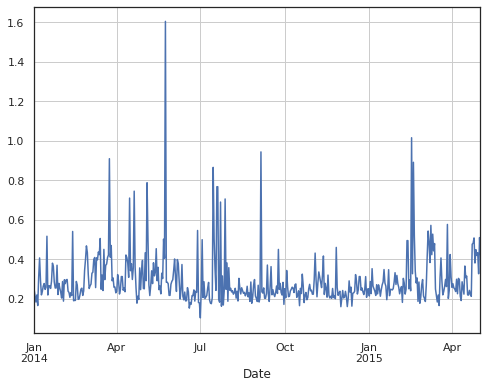

In [9]:
ec_data.plot(grid=True)

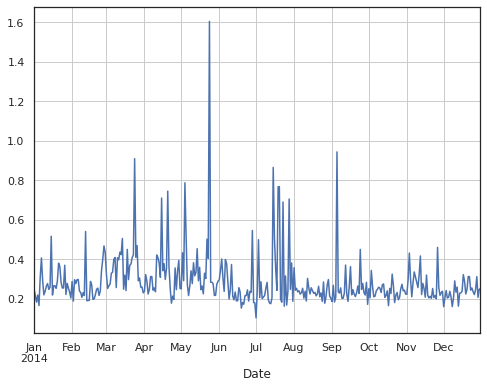

In [10]:
ec_df_2014=df.loc['2014']
ec_data_2014=ec_df_2014['WPI']
ec_data_2014.plot(grid=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94f3df8890>,
      dtype=object)

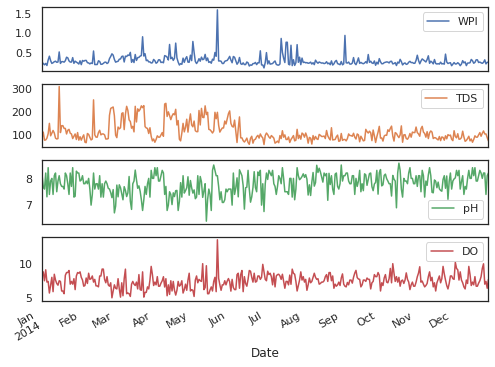

In [11]:
ec_df_2014=df.loc['2014']
ec_data_2014=ec_df_2014[['WPI','TDS','pH','DO']]
ec_data_2014.plot(subplots=True)

In [12]:
final_df = df.copy()

In [13]:
final_df.head(10)

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
Date,,,,,,,,,,,,,,,
2014-01-01,8.14,8.7,84.0,52,147.8,4.48,44,20,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
2014-01-02,7.70,8.8,110.0,76,188.0,8.61,44,36,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2014-01-03,7.60,7.5,75.0,44,128.0,8.11,28,20,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
2014-01-04,8.20,9.1,76.0,56,127.0,6.30,44,18,1.65,0.396,9.60,0.299591,2.238750,0.01536,0.219282
2014-01-05,7.31,7.3,84.0,52,140.0,5.50,28,20,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
2014-01-06,8.40,7.4,103.0,52,168.0,5.88,40,24,3.04,0.319,8.29,0.506000,12.810000,0.10600,0.308627
2014-01-07,7.40,5.7,148.0,68,247.0,10.40,56,20,4.48,0.189,17.36,0.314000,20.521000,0.24300,0.406891
2014-01-08,7.90,6.8,94.0,50,152.0,4.75,32,16,1.90,1.530,9.60,1.423000,8.830000,0.04500,0.291804
2014-01-09,8.00,8.0,106.0,60,182.0,7.57,42,16,2.65,0.224,9.64,0.157806,7.400000,0.01400,0.219930


In [14]:
final_df=final_df[['WPI','TDS','DO','pH']]

In [15]:
train = final_df[:50]
test = final_df[50:]
print(train.shape, test.shape)
train.head()

(50, 4) (437, 4)


,WPI,TDS,DO,pH
Date,,,,
2014-01-01,0.249528,84.0,8.7,8.14
2014-01-02,0.216400,110.0,8.8,7.70
2014-01-03,0.183814,75.0,7.5,7.60
2014-01-04,0.219282,76.0,9.1,8.20
2014-01-05,0.165831,84.0,7.3,7.31
